Mean after learning:  6.214285714285715
Sigma after learning:  2.425418120907094
Correct mean:  6.214285714285714
Correct sigma:  2.425418120907092


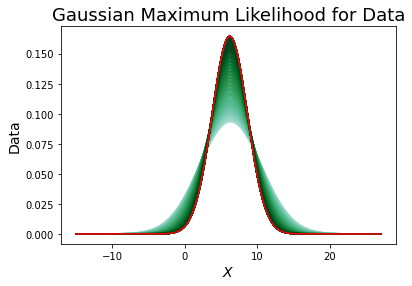

In [51]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm

data = [4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
N = len(data)

eta = 0.1 # learning rate
iterations = 800 # number of learning times

mu = 7 # initiate random mean
sigma = 5 # initiate random sigma

x_axis = np.arange(-15, 27, 0.001)

# Batch gradient descent
for i in range(iterations):
    error = [data[i] - mu for i in range(N)]
    error2 = [x**2 for x in error]
    
    # derivative mean and variance
    gradient_mu = (1/(sigma**2)) * np.sum(error)
    gradient_sigma = (1/(2 * sigma**2)) * (-N + (1/(sigma**2)) * np.sum(error2))

    if i > 30 and i < 150: # plot some learning lines
        color = mpl.colors.rgb2hex(plt.cm.BuGn((i) / 100 + 0.02)) # color
        plt.plot(x_axis, norm.pdf(x_axis, mu, sigma), linestyle="solid", color=color)
        
    mu = mu + eta * gradient_mu # update mean
    sigma = sigma + eta * gradient_sigma # update sigma

# Compare results
print('Mean after learning: ', mu)
print('Sigma after learning: ', sigma)
print('Correct mean: ', np.mean(data))
print('Correct sigma: ', np.std(data))

plt.xlabel('$X$', fontsize=14)
plt.ylabel('Data', fontsize=14)
plt.title('Gaussian Maximum Likelihood for Data', fontsize=18)
plt.plot(x_axis, norm.pdf(x_axis, mu, sigma), linestyle="solid", color="red") # fitting line
plt.show()